<a href="https://colab.research.google.com/github/nitesh-singh-datascience/team-power-telecom-churn-analysis/blob/Nitesh/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **“If I had an hour to solve a problem I'd spend 55 minutes thinking about the problem and 5 minutes thinking about solutions.”**
# ― **Albert Einstein**

In [1]:
# Importing Drive into colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
# Importing data from csv_file to python pandas
csv_data = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Project - EDA/Telecom Churn.csv")

In [4]:
type(csv_data)

pandas.core.frame.DataFrame

In [5]:
# Checking data
csv_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# This function helps in having a look at data columns, null values in columns
csv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# Describe function helps in applying aggregating function on every column
csv_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#Creating a column total_charges which has sum of night + day + eve charges




In [8]:
# This new column helps us to analyzed as per total charges a customer paid
csv_data['total_charges'] = csv_data['Total night charge'] + csv_data['Total day charge'] + csv_data['Total eve charge']
csv_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36


#Column total_minutes have sum of day + eve + night minutes

In [9]:
# Total Minutes columns shows us how much a customer is engaged per day
csv_data['total_minutes'] = csv_data['Total day minutes'] + csv_data['Total eve minutes'] + csv_data['Total night minutes']
csv_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86,707.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54,611.5
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00,527.2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02,558.2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36,501.9


In [82]:
# To analyze all columns we have converted churn grouped data to df
tmp = csv_data.groupby('Churn')
temp_df = pd.DataFrame(tmp.describe())

In [11]:
# Having description of all columns indiviually
for col in csv_data.columns:
  if col in temp_df:
    print(col)
    print(a[col].describe(),'\n\n')

Account length
        count        mean       std  min   25%    50%    75%    max
Churn                                                              
False  2850.0  100.793684  39.88235  1.0  73.0  100.0  127.0  243.0
True    483.0  102.664596  39.46782  1.0  76.0  103.0  127.0  225.0 


Area code
        count        mean        std    min    25%    50%    75%    max
Churn                                                                  
False  2850.0  437.074737  42.306156  408.0  408.0  415.0  510.0  510.0
True    483.0  437.817805  42.792270  408.0  408.0  415.0  510.0  510.0 


Number vmail messages
        count      mean        std  min  25%  50%   75%   max
Churn                                                        
False  2850.0  8.604561  13.913125  0.0  0.0  0.0  22.0  51.0
True    483.0  5.115942  11.860138  0.0  0.0  0.0   0.0  48.0 


Total day minutes
        count        mean        std  min      25%    50%     75%    max
Churn                                        

In [12]:
print(csv_data.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'total_charges', 'total_minutes'],
      dtype='object')


# Doing Univariate Analysis of all columns by box plots and groupby

**For Account Length**

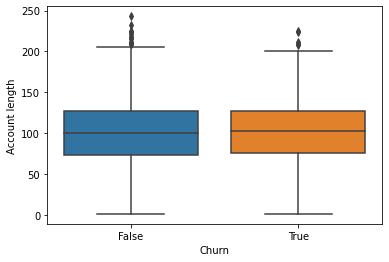

In [13]:
# Doing Univariate Analysis for all numeric data wrt Churn
sb.boxplot(x="Churn", y="Account length", data=csv_data)

**For Area Code**

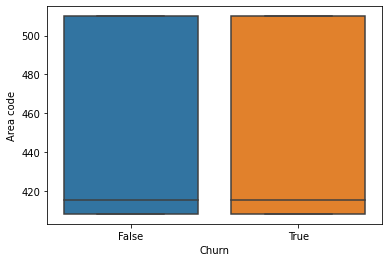

In [14]:
sb.boxplot(x="Churn", y="Area code", data=csv_data)

**For Number of Vmail messages**

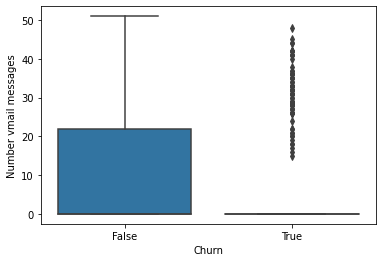

In [15]:
sb.boxplot(x="Churn", y="Number vmail messages", data=csv_data)

**For Total day minutes**

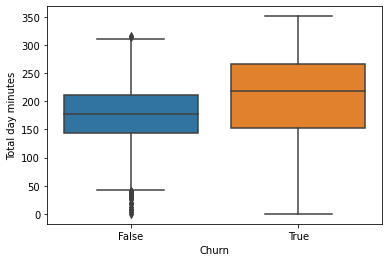

In [16]:
sb.boxplot(x="Churn", y="Total day minutes", data=csv_data)

**For Total day calls**

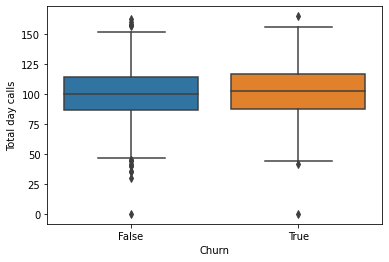

In [17]:
sb.boxplot(x="Churn", y="Total day calls", data=csv_data)

**For Total Day Charges**

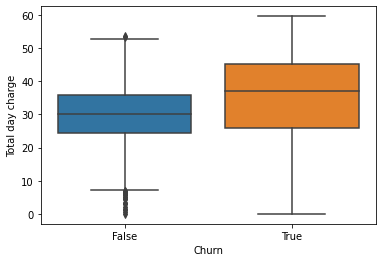

In [18]:
sb.boxplot(x="Churn", y="Total day charge", data=csv_data)

**For Total Evening Minutes**

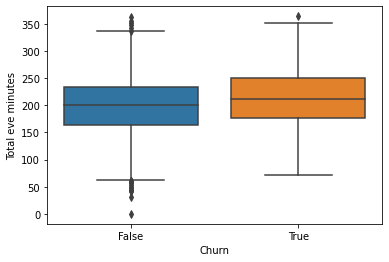

In [19]:
sb.boxplot(x="Churn", y="Total eve minutes", data=csv_data)

**For Total Eve Calls**

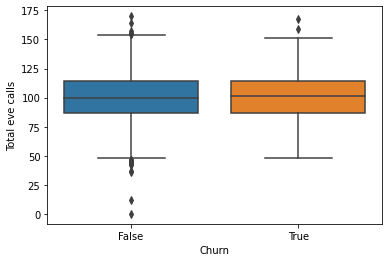

In [20]:
sb.boxplot(x="Churn", y="Total eve calls", data=csv_data)

**For Total Eve Charges**

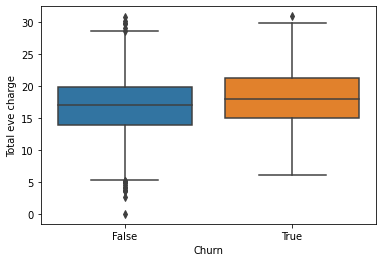

In [21]:
sb.boxplot(x="Churn", y="Total eve charge", data=csv_data)

**For Total Night Minutes**

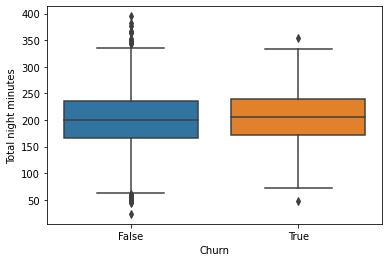

In [22]:
sb.boxplot(x="Churn", y="Total night minutes", data=csv_data)

**For Total Night Calls**

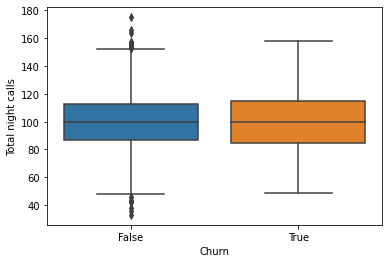

In [23]:
sb.boxplot(x="Churn", y="Total night calls", data=csv_data)

**For Total Night Charges**

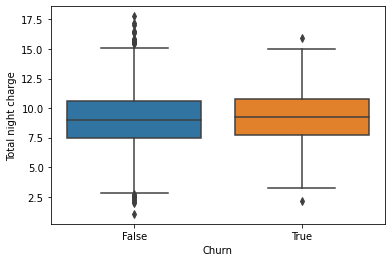

In [24]:
sb.boxplot(x="Churn", y="Total night charge", data=csv_data)

**For Total International Minutes**

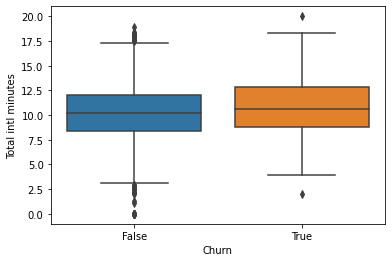

In [25]:
sb.boxplot(x="Churn", y="Total intl minutes", data=csv_data)

**For Total International Calls**

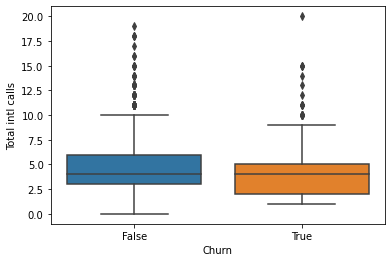

In [26]:
sb.boxplot(x="Churn", y="Total intl calls", data=csv_data)

**For Total International Charges**

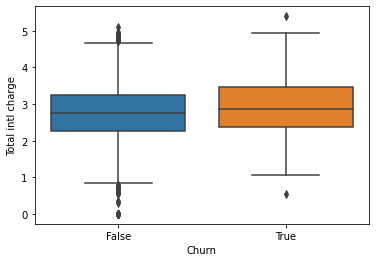

In [27]:
sb.boxplot(x="Churn", y="Total intl charge", data=csv_data)

**For Customer Service Calls**

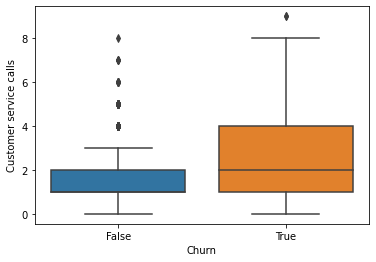

In [28]:
sb.boxplot(x="Churn", y="Customer service calls", data=csv_data)

**For Total Charges**

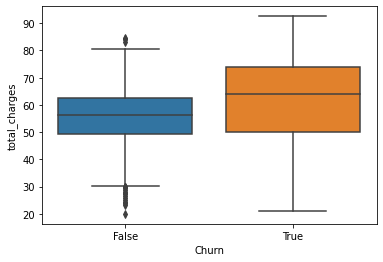

In [29]:
sb.boxplot(x="Churn", y="total_charges", data=csv_data)

**For Total Minutes**

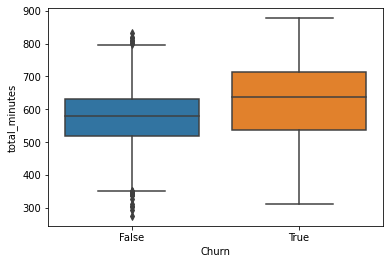

In [30]:
sb.boxplot(x="Churn", y="total_minutes", data=csv_data)

# **From univariate analysis we can say that total day minutes, total minutes, total charges, international calls and no of voice calls are factors on which we can perform analysis**

# From here we have categorical data and to see their impact, we have to check their impact with respect to churn. Hence grouping them will be a good option. From here our Bivariate analysis Starts

**Area Code w.r.t Churn**

In [31]:
csv_data.groupby(['Area code', 'Churn'])['Area code'].value_counts()

Area code  Churn  Area code
408        False  408           716
           True   408           122
415        False  415          1419
           True   415           236
510        False  510           715
           True   510           125
Name: Area code, dtype: int64

**International plan w.r.t Churn**

In [32]:
csv_data.groupby(['International plan', 'Churn'])['International plan'].value_counts()

International plan  Churn  International plan
No                  False  No                    2664
                    True   No                     346
Yes                 False  Yes                    186
                    True   Yes                    137
Name: International plan, dtype: int64

**Voice mail plan w.r.t Churn**

In [33]:
voice_mail_analysis = csv_data.groupby(['Voice mail plan', 'Churn'])['Voice mail plan'].describe()
voice_mail_analysis

count unique  top  freq
Voice mail plan Churn                        
No              False  2008      1   No  2008
                True    403      1   No   403
Yes             False   842      1  Yes   842
                True     80      1  Yes    80

# After analyzing we came to a conclusion that total_day_minutes, voice mail plan, interntional calls and customer service calls are the factors which are impacting churned customers.

In [34]:
voice_mail_analysis = voice_mail_analysis.assign(percentage_customers = lambda x: (x['count'] /sum(voice_mail_analysis['count']) * 100))
voice_mail_analysis

count unique  top  freq percentage_customers
Voice mail plan Churn                                             
No              False  2008      1   No  2008               60.246
                True    403      1   No   403              12.0912
Yes             False   842      1  Yes   842              25.2625
                True     80      1  Yes    80              2.40024

# Dividing data between churned and unchurned 

In [35]:
churn_true = csv_data[csv_data['Churn'] == True]
churn_false = csv_data[csv_data['Churn'] == False]

# Selecting the Customers having percentile of churned more than 50

In [36]:
# Grouping Customer calls wrt to state and taking only the states which has more than 50 percentile of calls
customer_calls_grouped_by_state = churn_true.groupby('State')['Customer service calls'].describe()
customer_calls_grouped_by_state.reset_index(inplace=True)
max_calls_in_a_state = max(customer_calls_grouped_by_state['count'])
customer_calls_grouped_by_state = customer_calls_grouped_by_state.assign(percentile_calls = lambda x: (x['count'] / max_calls_in_a_state * 100))
customer_calls_grouped_by_state_percentile_greater_than_50 = customer_calls_grouped_by_state[customer_calls_grouped_by_state['percentile_calls'] > 50]
customer_calls_grouped_by_state_percentile_greater_than_50

,State,count,mean,std,min,25%,50%,75%,max,percentile_calls
2,AR,11.0,3.818182,2.136267,0.0,2.50,4.0,5.00,7.0,61.111111
6,CT,12.0,1.416667,1.621354,0.0,0.00,1.0,2.00,5.0,66.666667
16,KS,13.0,1.692308,1.436698,0.0,1.00,1.0,3.00,4.0,72.222222
19,MA,11.0,1.363636,1.433369,0.0,0.00,1.0,2.50,4.0,61.111111
20,MD,17.0,2.235294,1.821037,0.0,1.00,2.0,3.00,6.0,94.444444
21,ME,13.0,2.000000,1.779513,0.0,0.00,2.0,4.00,4.0,72.222222
22,MI,16.0,2.437500,2.220173,0.0,1.00,2.0,3.50,7.0,88.888889
23,MN,15.0,2.733333,2.491892,0.0,1.00,2.0,4.00,9.0,83.333333
25,MS,14.0,2.285714,1.938619,0.0,1.00,1.5,4.00,6.0,77.777778
26,MT,14.0,2.571429,1.741542,0.0,1.00,2.0,4.00,6.0,77.777778


# Plotting between customer calls in different state vs their percentile

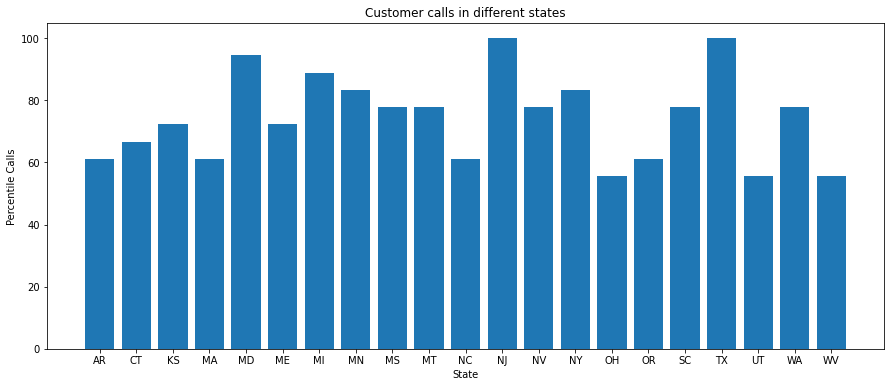

In [37]:
# Plotting the data of states having more than 50 percentile customer calls
plt.rcParams['figure.figsize'] = (15, 6)
plt.bar(customer_calls_grouped_by_state_percentile_greater_than_50['State'] , customer_calls_grouped_by_state_percentile_greater_than_50['percentile_calls'])
plt.xlabel("State")
plt.ylabel("Percentile Calls")
plt.title("Customer calls in different states")
plt.show()

# Plotting between International plan where churn is true

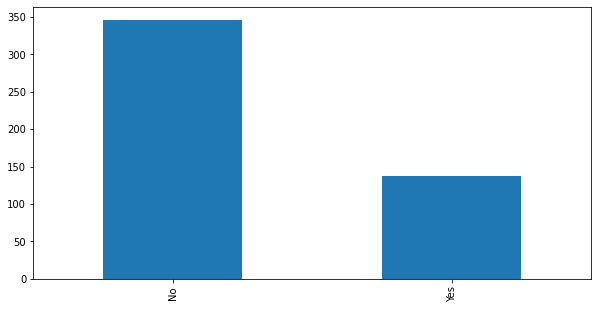

In [38]:
plt.rcParams['figure.figsize'] = (10, 5)
churn_true['International plan'].value_counts().plot(kind = 'bar')

# Plotting between International plan where churn is false

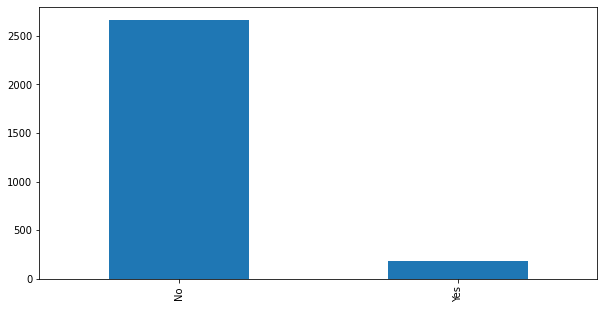

In [39]:
churn_false['International plan'].value_counts().plot(kind = 'bar')

# Plotting between voice mail plan where churn is True

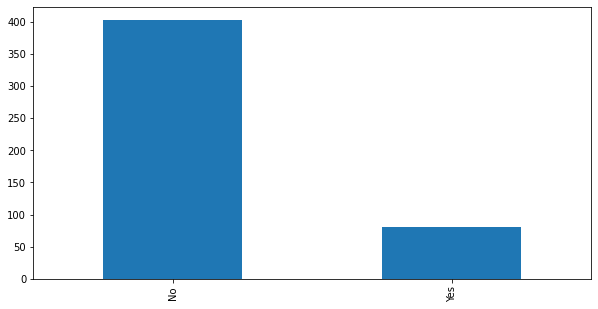

In [40]:
churn_true['Voice mail plan'].value_counts().plot(kind = 'bar')

# Plotting between voice mail plan where churn is false

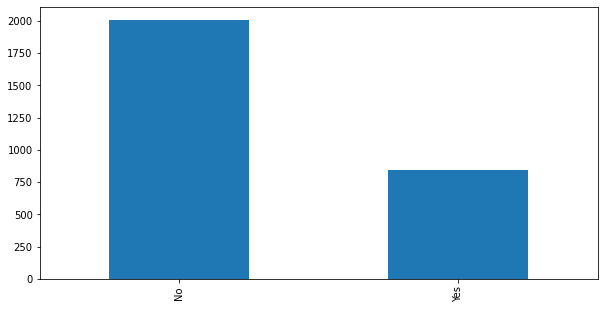

In [41]:
churn_false['Voice mail plan'].value_counts().plot(kind = 'bar')


# Plotting between area code where churn is True

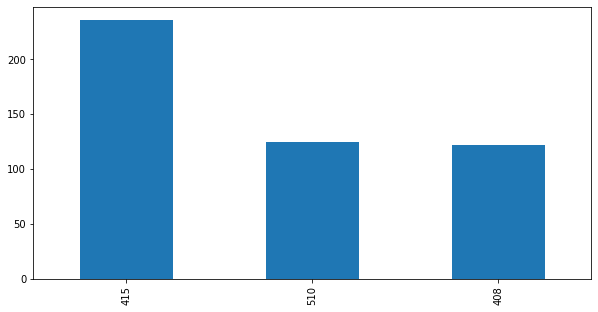

In [42]:
churn_true['Area code'].value_counts().plot(kind = 'bar')

# Plotting between area code where churn is false

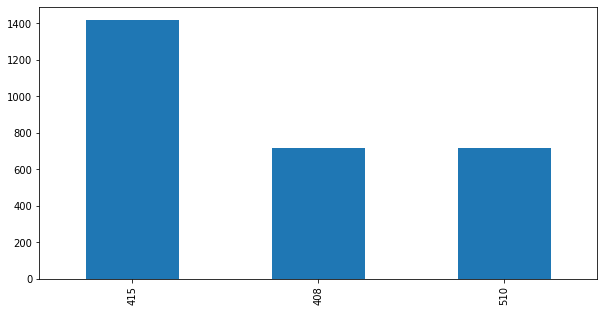

In [43]:
churn_false['Area code'].value_counts().plot(kind = 'bar')

In [44]:
vc_active = churn_true[churn_true['Voice mail plan'] == 'Yes']
vc_active.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,total_charges,total_minutes
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,104.712500,441.575000,30.887500,176.58500,101.237500,30.020375,202.632500,100.962500,17.224250,193.231250,101.950000,8.695000,11.145000,4.637500,3.009625,2.587500,55.939625,572.448750
std,34.289975,45.169099,7.219863,50.83929,18.483139,8.643009,50.189055,19.773044,4.266139,48.078174,19.187219,2.163443,3.121339,3.040835,0.842378,2.016977,9.730624,84.614005
min,17.000000,408.000000,15.000000,82.30000,59.000000,13.990000,75.300000,56.000000,6.400000,82.300000,49.000000,3.700000,4.100000,1.000000,1.110000,0.000000,36.710000,406.200000
25%,80.000000,408.000000,27.000000,145.85000,89.000000,24.797500,166.975000,90.750000,14.197500,165.200000,85.000000,7.432500,8.950000,2.750000,2.417500,1.000000,48.612500,507.575000
50%,105.500000,415.000000,31.000000,171.45000,101.000000,29.150000,203.800000,102.000000,17.320000,192.450000,102.500000,8.660000,11.100000,4.000000,3.000000,2.000000,54.325000,569.550000
75%,128.750000,510.000000,35.000000,209.92500,114.250000,35.690000,238.650000,115.250000,20.285000,216.925000,116.000000,9.760000,13.650000,6.000000,3.685000,4.000000,61.260000,616.525000
max,188.000000,510.000000,48.000000,322.40000,147.000000,54.810000,315.400000,136.000000,26.810000,321.200000,145.000000,14.450000,20.000000,20.000000,5.400000,9.000000,88.310000,815.100000


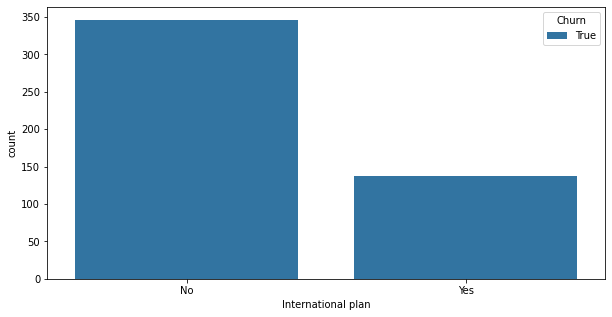

In [45]:
plt.figure(figsize=(10,5))
sb.countplot(x='International plan', hue='Churn', data=churn_true);

In [46]:
for col in churn_true.columns:
  if col in churn_true:
    print(col)
    print(churn_true[col].describe(),'\n\n')

State
count     483
unique     51
top        TX
freq       18
Name: State, dtype: object 


Account length
count    483.000000
mean     102.664596
std       39.467820
min        1.000000
25%       76.000000
50%      103.000000
75%      127.000000
max      225.000000
Name: Account length, dtype: float64 


Area code
count    483.000000
mean     437.817805
std       42.792270
min      408.000000
25%      408.000000
50%      415.000000
75%      510.000000
max      510.000000
Name: Area code, dtype: float64 


International plan
count     483
unique      2
top        No
freq      346
Name: International plan, dtype: object 


Voice mail plan
count     483
unique      2
top        No
freq      403
Name: Voice mail plan, dtype: object 


Number vmail messages
count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64 


Total day minutes
count    48

# Creating columns Months on the basis of Account length to classify data

In [47]:
churn_true = churn_true.assign(Months = lambda x: (x['Account length'] //28))
churn_false = churn_false.assign(Months = lambda x: (x['Account length'] //28))

In [48]:
monthy_analysis_true = churn_true.groupby('Months')['Months'].describe()
monthly_analysis_false = churn_false.groupby('Months')['Months'].describe()

In [49]:
churn_true.groupby('Months').describe()

Account length                        ... total_minutes                
                count        mean       std  ...           50%      75%    max
Months                                       ...                              
0                16.0   18.000000  7.788881  ...        634.05  712.725  782.2
1                41.0   45.073171  7.626894  ...        651.70  717.200  785.7
2                95.0   70.936842  7.577698  ...        675.80  730.850  871.7
3               134.0   98.201493  7.694134  ...        608.25  709.100  876.9
4               121.0  124.272727  7.987490  ...        619.60  709.500  817.9
5                49.0  153.061224  7.550961  ...        593.40  722.000  821.2
6                20.0  177.000000  6.727790  ...        646.70  699.475  841.3
7                 5.0  205.400000  6.188699  ...        703.70  711.800  776.3
8                 2.0  224.500000  0.707107  ...        596.50  622.800  649.1

[9 rows x 144 columns]

In [50]:
monthy_analysis_true

,count,mean,std,min,25%,50%,75%,max
Months,,,,,,,,
0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,95.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
3,134.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
4,121.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
5,49.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
6,20.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
7,5.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
8,2.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0


In [51]:
monthly_analysis_false.reset_index(inplace = True)

**Checking the percentage of churned customers in different months**

In [52]:
t_cnt = churn_true['Months'].count()
for i in range(len(churn_true['Months'].unique())):
  #print(f'For month {i} to {i+1} churned customer percentage is  {monthy_analysis.iloc[i]['count'] / t_cnt * 100}')
  print(f"For month {i} to {i+1} churned customer percentage is {monthy_analysis_true.iloc[i]['count'] / t_cnt * 100}")
  

For month 0 to 1 churned customer percentage is 3.3126293995859215
For month 1 to 2 churned customer percentage is 8.488612836438923
For month 2 to 3 churned customer percentage is 19.66873706004141
For month 3 to 4 churned customer percentage is 27.74327122153209
For month 4 to 5 churned customer percentage is 25.051759834368532
For month 5 to 6 churned customer percentage is 10.144927536231885
For month 6 to 7 churned customer percentage is 4.140786749482402
For month 7 to 8 churned customer percentage is 1.0351966873706004
For month 8 to 9 churned customer percentage is 0.4140786749482402


# Categorizing customers on the count of customer calls on the months

In [53]:
monthy_customer_service = churn_true.groupby('Months')['Customer service calls'].describe()
monthy_customer_service.reset_index(inplace=True)
total_cust = sum(monthy_customer_service['count'])
total_cust_false = sum(monthly_analysis_false['count'])
monthy_customer_service = monthy_customer_service.assign(percentage_customers = lambda x: (x['count'] /total_cust * 100))
monthy_customer_service

,Months,count,mean,std,min,25%,50%,75%,max,percentage_customers
0,0,16.0,1.875000,1.892969,0.0,0.75,1.5,2.00,6.0,3.312629
1,1,41.0,2.292683,2.040146,0.0,1.00,2.0,4.00,9.0,8.488613
2,2,95.0,1.936842,1.718550,0.0,0.50,1.0,3.50,6.0,19.668737
3,3,134.0,2.492537,1.995281,0.0,1.00,2.0,4.00,8.0,27.743271
4,4,121.0,2.280992,1.757001,0.0,1.00,2.0,4.00,7.0,25.051760
5,5,49.0,2.204082,1.989342,0.0,1.00,2.0,4.00,9.0,10.144928
6,6,20.0,1.850000,1.225819,0.0,1.00,2.0,3.00,4.0,4.140787
7,7,5.0,2.600000,1.516575,1.0,2.00,2.0,3.00,5.0,1.035197
8,8,2.0,0.500000,0.707107,0.0,0.25,0.5,0.75,1.0,0.414079


In [54]:
monthly_analysis_false = monthly_analysis_false.assign(percentage_customers = lambda x: (x['count'] /total_cust_false * 100))
monthly_analysis_false

,Months,count,mean,std,min,25%,50%,75%,max,percentage_customers
0,0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.263158
1,1,274.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,9.614035
2,2,577.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,20.245614
3,3,783.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0,27.473684
4,4,653.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,22.912281
5,5,333.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,11.684211
6,6,111.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0,3.894737
7,7,22.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0,0.771930
8,8,4.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0,0.140351


# Plotting between customer service calls and percentage of churned customers

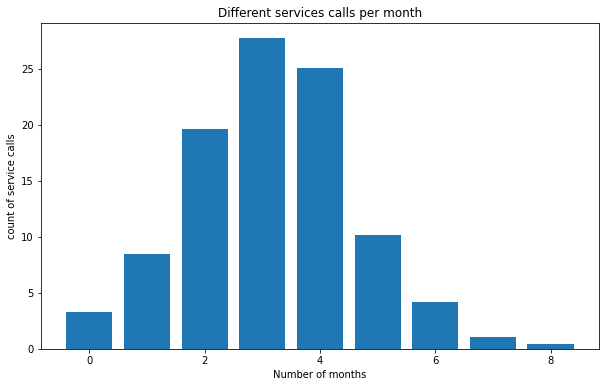

In [55]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(monthy_customer_service['Months'] , monthy_customer_service['percentage_customers'])
plt.xlabel("Number of months")
plt.ylabel("count of service calls")
plt.title("Different services calls per month")
plt.show()

# Plotting between customer service calls and unchurned customers

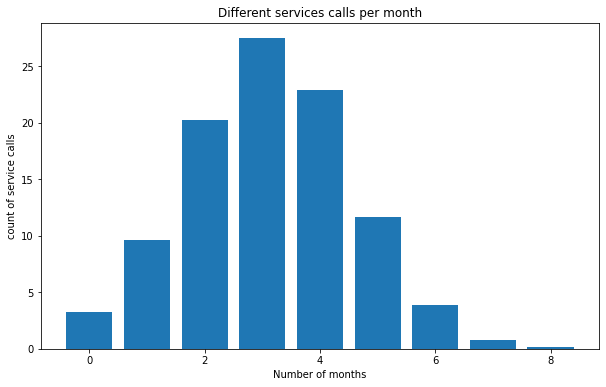

In [56]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(monthly_analysis_false['Months'] , monthly_analysis_false['percentage_customers'])
plt.xlabel("Number of months")
plt.ylabel("count of service calls")
plt.title("Different services calls per month")
plt.show()

In [57]:
t_cnt = churn_true['Months'].count()
for i in range(len(churn_true['Months'].unique())):
  #print(f'For month {i} to {i+1} churned customer percentage is  {monthy_analysis.iloc[i]['count'] / t_cnt * 100}')
  print(f"For month {i} to {i+1} churned customer Service calls percentage is {monthy_customer_service.iloc[i]['count'] / t_cnt * 100}")


For month 0 to 1 churned customer Service calls percentage is 3.3126293995859215
For month 1 to 2 churned customer Service calls percentage is 8.488612836438923
For month 2 to 3 churned customer Service calls percentage is 19.66873706004141
For month 3 to 4 churned customer Service calls percentage is 27.74327122153209
For month 4 to 5 churned customer Service calls percentage is 25.051759834368532
For month 5 to 6 churned customer Service calls percentage is 10.144927536231885
For month 6 to 7 churned customer Service calls percentage is 4.140786749482402
For month 7 to 8 churned customer Service calls percentage is 1.0351966873706004
For month 8 to 9 churned customer Service calls percentage is 0.4140786749482402


In [58]:
churn_true.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes,Months
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,50.77,566.4,2
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,90.83,811.3,5
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,34.48,441.9,2
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,76.49,782.2,0
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True,52.26,499.2,4


#Adding column total hours by dividing total minutes by 60

In [59]:
churn_true = churn_true.assign(total_hours = lambda x: (x['total_minutes'] //60))
total_hrs = churn_true.groupby('total_hours')['Customer service calls'].describe()
total_hrs.reset_index(inplace = True)
total_hrs

,total_hours,count,mean,std,min,25%,50%,75%,max
0,5.0,5.0,4.400000,0.547723,4.0,4.00,4.0,5.0,5.0
1,6.0,6.0,3.333333,1.751190,0.0,3.25,4.0,4.0,5.0
2,7.0,34.0,3.117647,1.919039,0.0,1.25,4.0,5.0,7.0
3,8.0,84.0,3.642857,1.787796,0.0,2.00,4.0,5.0,7.0
4,9.0,79.0,2.620253,2.197340,0.0,1.00,2.0,4.0,9.0
5,10.0,64.0,1.390625,1.340661,0.0,0.00,1.0,2.0,6.0
6,11.0,105.0,1.523810,1.241085,0.0,1.00,1.0,2.0,5.0
7,12.0,76.0,1.618421,1.496370,0.0,1.00,1.0,2.0,9.0
8,13.0,26.0,1.576923,1.419100,0.0,0.25,1.0,2.0,5.0
9,14.0,4.0,0.750000,0.500000,0.0,0.75,1.0,1.0,1.0


# Plotting between total hours and count of service calls for churned customers

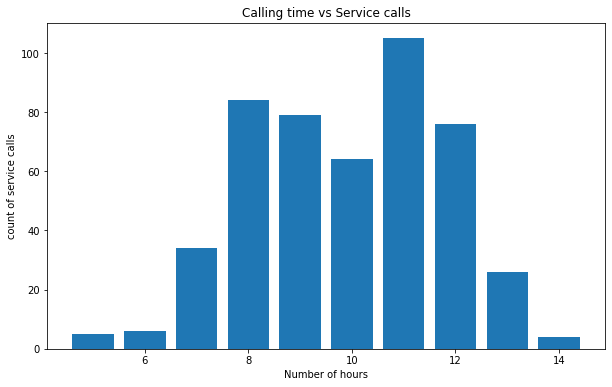

In [60]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(total_hrs['total_hours'] , total_hrs['count'])
plt.xlabel("Number of hours")
plt.ylabel("count of service calls")
plt.title("Calling time vs Service calls")
plt.show()

Above graph shows that customers who are talking 7 hrs to 13 hrs are churning 

# Plotting between total hours and count of service calls for unchurned customers

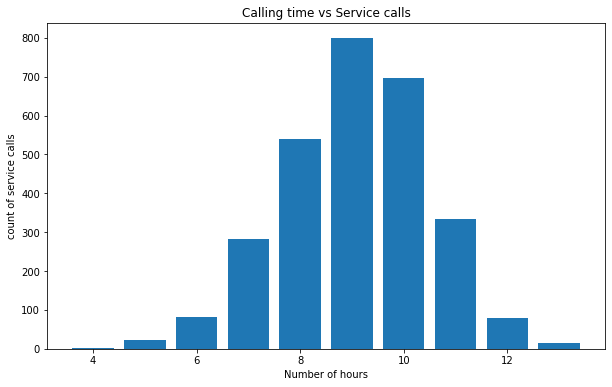

In [61]:
churn_false = churn_false.assign(total_hours = lambda x: (x['total_minutes'] //60))
total_hrs_false = churn_false.groupby('total_hours')['Customer service calls'].describe()
total_hrs_false.reset_index(inplace = True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.bar(total_hrs_false['total_hours'] , total_hrs_false['count'])
plt.xlabel("Number of hours")
plt.ylabel("count of service calls")
plt.title("Calling time vs Service calls")
plt.show()

In [62]:
churn_true.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes,Months,total_hours
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,50.77,566.4,2,9.0
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,90.83,811.3,5,13.0
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,34.48,441.9,2,7.0
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,76.49,782.2,0,13.0
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True,52.26,499.2,4,8.0


In [63]:
churn_true.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes,Months,total_hours
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,50.77,566.4,2,9.0
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,90.83,811.3,5,13.0
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True,34.48,441.9,2,7.0
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True,76.49,782.2,0,13.0
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True,52.26,499.2,4,8.0
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True,53.15,533.6,4,8.0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True,53.52,574.6,3,9.0
57,CO,121,408,No,Yes,30,198.4,129,33.73,75.3,77,6.40,181.2,77,8.15,5.8,3,1.57,3,True,48.28,454.9,4,7.0
69,TX,150,510,No,No,0,178.9,101,30.41,169.1,110,14.37,148.6,100,6.69,13.8,3,3.73,4,True,51.47,496.6,5,8.0
76,DC,82,415,No,No,0,300.3,109,51.05,181.0,100,15.39,270.1,73,12.15,11.7,4,3.16,0,True,78.59,751.4,2,12.0


# Adding column total_day_hours by dividing total day minutes by 60

**As from univariate analysis we know that total_day_minutes is an important factor so we are doing filtering on this factor**

In [64]:
churn_true = churn_true.assign(total_day_hours = lambda x: (x['Total day minutes'] //60))
#total_day_hrs = churn_true.groupby('total_hours')['Customer service calls'].describe()
#total_day_hrs.reset_index(inplace = True)
day_hours_time = churn_true.groupby('total_day_hours')['Account length'].describe()
day_hours_time.reset_index(inplace = True)
day_hours_time

,total_day_hours,count,mean,std,min,25%,50%,75%,max
0,0.0,6.0,115.333333,40.416168,47.0,102.75,121.5,135.0,166.0
1,1.0,46.0,93.521739,33.255736,21.0,76.25,98.0,108.0,193.0
2,2.0,141.0,105.290780,39.273862,2.0,85.00,108.0,124.0,225.0
3,3.0,109.0,105.412844,41.089832,1.0,73.00,105.0,133.0,212.0
4,4.0,149.0,102.187919,39.068957,12.0,74.00,105.0,127.0,209.0
5,5.0,32.0,94.718750,44.006037,13.0,74.75,87.5,124.5,208.0


In [65]:
churn_true.groupby(['Months','total_day_hours'])['Customer service calls'].describe()

count      mean       std  min   25%  50%   75%  max
Months total_day_hours                                                      
0      1.0                2.0  3.000000  2.828427  1.0  2.00  3.0  4.00  5.0
       2.0                4.0  2.500000  2.516611  0.0  1.50  2.0  3.00  6.0
       3.0                3.0  2.333333  2.516611  0.0  1.00  2.0  3.50  5.0
       4.0                5.0  1.000000  0.707107  0.0  1.00  1.0  1.00  2.0
       5.0                2.0  1.000000  1.414214  0.0  0.50  1.0  1.50  2.0
1      0.0                1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
       1.0                3.0  3.000000  2.645751  1.0  1.50  2.0  4.00  6.0
       2.0               11.0  3.545455  2.018100  0.0  3.00  4.0  5.00  6.0
       3.0               10.0  2.300000  2.496664  0.0  1.00  2.0  2.00  9.0
       4.0               13.0  1.230769  1.012739  0.0  0.00  1.0  2.00  3.0
       5.0                3.0  2.333333  1.527525  1.0  1.50  2.0  3.00  4.0
2      1.0               11.0  2.727273  2.195036  0.0  0.50  4.0  4.00  6.0
       2.0               20.0  3.300000  1.750188  0.0  1.75  4.0  5.00  6.0
       3.0               20.0  1.450000  1.394538  0.0  0.00  1.0  2.00  4.0
       4.0               34.0  1.441176  1.210839  0.0  1.00  1.0  2.00  4.0
       5.0               10.0  1.000000  1.490712  0.0  0.00  0.0  1.75  4.0
3      0.0                1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0
       1.0               20.0  3.750000  1.996708  0.0  2.00  4.0  5.25  7.0
       2.0               43.0  3.534884  2.039477  0.0  2.00  4.0  5.00  8.0
       3.0               27.0  1.592593  1.623369  0.0  0.50  1.0  2.00  6.0
       4.0               37.0  1.378378  1.138990  0.0  0.00  1.0  2.00  4.0
       5.0                6.0  1.500000  1.378405  0.0  1.00  1.0  1.75  4.0
4      0.0                3.0  3.333333  2.081666  1.0  2.50  4.0  4.50  5.0
       1.0                6.0  3.166667  2.136976  0.0  2.00  3.5  5.00  5.0
       2.0               39.0  3.102564  1.860884  0.0  1.50  4.0  4.50  7.0
       3.0               29.0  1.793103  1.448628  0.0  1.00  2.0  3.00  5.0
       4.0               39.0  1.769231  1.512432  0.0  1.00  1.0  3.00  5.0
       5.0                5.0  1.000000  0.707107  0.0  1.00  1.0  1.00  2.0
5      0.0                1.0  0.000000       NaN  0.0  0.00  0.0  0.00  0.0
       1.0                3.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0
       2.0               17.0  3.117647  1.900077  0.0  1.00  4.0  4.00  7.0
       3.0               14.0  1.642857  2.405351  0.0  0.00  1.0  2.00  9.0
       4.0                9.0  1.222222  0.971825  0.0  1.00  1.0  2.00  3.0
       5.0                5.0  1.800000  1.303840  1.0  1.00  1.0  2.00  4.0
6      1.0                1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0
       2.0                4.0  2.000000  1.632993  0.0  1.50  2.0  2.50  4.0
       3.0                4.0  2.250000  1.500000  1.0  1.00  2.0  3.25  4.0
       4.0               11.0  1.636364  1.120065  0.0  1.00  2.0  2.50  3.0
7      2.0                1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
       3.0                2.0  1.500000  0.707107  1.0  1.25  1.5  1.75  2.0
       4.0                1.0  3.000000       NaN  3.0  3.00  3.0  3.00  3.0
       5.0                1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0
8      2.0                2.0  0.500000  0.707107  0.0  0.25  0.5  0.75  1.0

In [66]:

day_hours_time = churn_true.groupby(['total_day_hours','Months'])['Customer service calls'].describe()
day_hours_time.reset_index(inplace=True)
day_hours_time

,total_day_hours,Months,count,mean,std,min,25%,50%,75%,max
0,0.0,1,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
1,0.0,3,1.0,4.000000,NaN,4.0,4.00,4.0,4.00,4.0
2,0.0,4,3.0,3.333333,2.081666,1.0,2.50,4.0,4.50,5.0
3,0.0,5,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
4,1.0,0,2.0,3.000000,2.828427,1.0,2.00,3.0,4.00,5.0
5,1.0,1,3.0,3.000000,2.645751,1.0,1.50,2.0,4.00,6.0
6,1.0,2,11.0,2.727273,2.195036,0.0,0.50,4.0,4.00,6.0
7,1.0,3,20.0,3.750000,1.996708,0.0,2.00,4.0,5.25,7.0
8,1.0,4,6.0,3.166667,2.136976,0.0,2.00,3.5,5.00,5.0
9,1.0,5,3.0,4.000000,0.000000,4.0,4.00,4.0,4.00,4.0


# In the graph below y axis represent churned customer for different months filtered by day hours usage

In [ ]:
(day_hours_time.pivot_table(index='Months', columns='total_day_hours', values='count',
                aggfunc='sum', fill_value=0)
   .plot.bar()
)

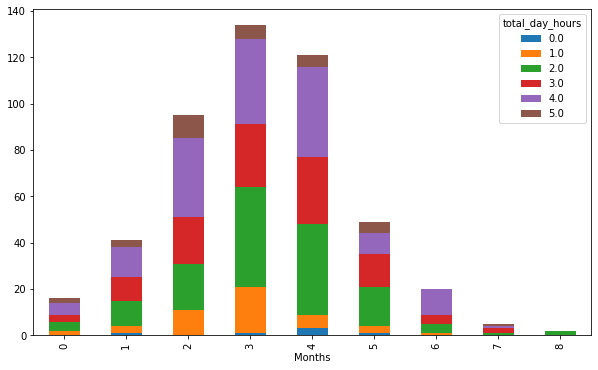

In [89]:
(day_hours_time.pivot_table(index='Months', columns='total_day_hours', values='count',
                aggfunc='sum', fill_value=0)
   .plot.bar(stacked=True)
)

# Analyzing data wrt total_hrs, months, count of churned customer 

In [81]:
total_hours_time = churn_true.groupby(['Months','total_hours'])['Account length'].describe()
total_hours_time.reset_index(inplace = True)
total_hours_time.head()

,Months,total_hours,count,mean,std,min,25%,50%,75%,max
0,0,7.0,2.0,1.500000,0.707107,1.0,1.25,1.5,1.75,2.0
1,0,8.0,2.0,22.500000,2.121320,21.0,21.75,22.5,23.25,24.0
2,0,9.0,2.0,20.000000,4.242641,17.0,18.50,20.0,21.50,23.0
3,0,10.0,3.0,21.333333,4.618802,16.0,20.00,24.0,24.00,24.0
4,0,11.0,4.0,20.000000,5.291503,13.0,17.50,21.0,23.50,25.0


# In the graph below y axis represent churned customer for different months filtered by toal hours usage

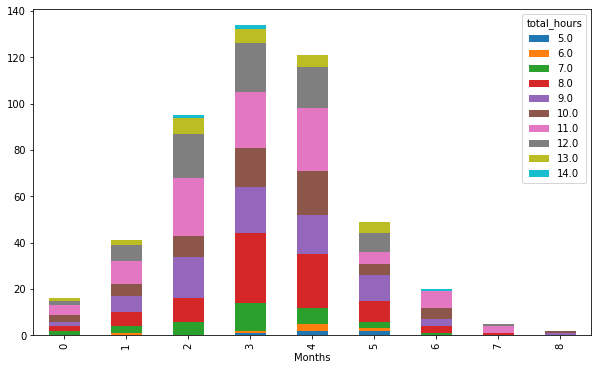

In [80]:
(total_hours_time.pivot_table(index='Months', columns='total_hours', values='count',
                aggfunc='sum', fill_value=0)
   .plot.bar(stacked=True)
)

In [68]:
sum(day_hours_time['count'])

483.0

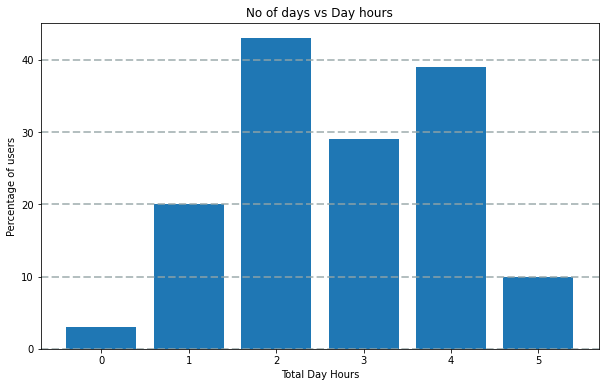

<Figure size 640x480 with 0 Axes>

In [91]:

plt.bar(day_hours_time['total_day_hours'] , day_hours_time['count'])
plt.xlabel("Total Day Hours")
plt.ylabel("Percentage of users")
plt.title("No of days vs Day hours")
#plt.bar(range(len(data)), data, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.figure(figsize=(8, 6), dpi=80)
plt.show()

In [70]:
churn_false = churn_false.assign(total_day_hours = lambda x: (x['Total day minutes'] //60))
#total_day_hrs = churn_true.groupby('total_hours')['Customer service calls'].describe()
#total_day_hrs.reset_index(inplace = True)
day_hours_time_false = churn_false.groupby('total_day_hours')['Account length'].describe()
day_hours_time_false.reset_index(inplace = True)
day_hours_time_false

,total_day_hours,count,mean,std,min,25%,50%,75%,max
0,0.0,47.0,100.446809,45.183110,13.0,64.50,98.0,128.00,205.0
1,1.0,354.0,101.968927,39.384092,3.0,77.25,100.0,126.75,243.0
2,2.0,1083.0,100.283472,39.612004,1.0,73.50,99.0,126.50,232.0
3,3.0,1106.0,100.984629,40.634545,1.0,73.00,101.0,129.00,225.0
4,4.0,249.0,101.160643,36.663222,8.0,74.00,103.0,127.00,189.0
5,5.0,11.0,87.181818,56.222448,13.0,50.00,67.0,118.50,210.0


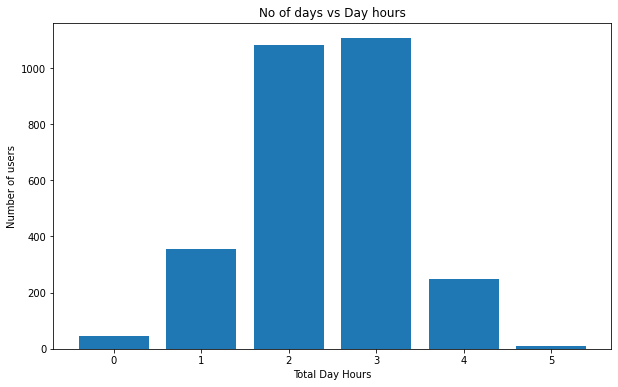

In [71]:

plt.bar(day_hours_time_false['total_day_hours'] , day_hours_time_false['count'])
plt.xlabel("Total Day Hours")
plt.ylabel("Number of users")
plt.title("No of days vs Day hours")
plt.show()

# From above analysis we found:
1. Max people churned are day users
2. From churned customers around more than 70% used product for 1 to 5 months
3. For churned customers service calls is more than 2
4. Max churned customers were using product for 2 to 5 hrs daily day calls
5. After analyzing months and hours we found that max customers churned customers were using product for 2 to 5 minutes and 2 to 6 hours daily.
6. There are some certain states which has more curned rate than others.